In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import time

# 1

### a)

In [89]:
def CaminanteAleatorioNormal(N, trials, mu, sigma):
    start_time = time.time()  # Comienza a medir el tiempo
    X = np.zeros((trials, N))
    
    for i in range(N):
        steps = np.random.normal(loc=mu, scale=sigma, size=trials)
        directions = np.random.choice([-1, 1], size=trials)
        dx = steps * directions
        X[:, i] = dx
    
    X = np.cumsum(X, axis=1)
    R2 = np.mean(X**2, axis=0)
    Xmean = np.mean(X, axis=0)
    delta_X2 = R2 - Xmean**2  # Varianza de la posición

    tiempo = time.time() - start_time  # Calcula el tiempo de ejecución
    nu = np.log(R2[-1]) / np.log(N)   # Ajuste lineal en el log-log para encontrar nu

    return Xmean, R2, delta_X2, X[:, -1], nu, tiempo 

In [90]:
def plots(N, Xmean, R2, XparaN, title, nu, tiempo):
    Ngraf = np.arange(1, N + 1)
    delta_X2 = R2 - Xmean**2  # Calculate ⟨(ΔX)^2⟩ for each N

    fig = plt.figure(figsize=(14, 7))  # Adjusted for better visibility

    # Plot ⟨X⟩, ⟨X^2⟩, and ⟨(ΔX)^2⟩
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(Ngraf, Xmean, 'b', label=r'$\langle X \rangle$')
    ax1.plot(Ngraf, delta_X2, 'g', label=r'$\langle (\Delta X)^2 \rangle$')
    ax1.legend(loc='best', fontsize=12)
    ax1.set_xlabel(r'$N$', fontsize=18)
    ax1.set_ylabel('Values', fontsize=18)
    ax1.set_title('Estadísticas de desplazamiento')

    # Plot R^2 over N
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(Ngraf, R2, 'b', label=r'$R^2$ vs. $N$')
    ax2.legend(loc='best', fontsize=12)
    ax2.set_xlabel(r'$N$', fontsize=18)
    ax2.set_ylabel(r'$R^2$', fontsize=18)
    ax2.set_title('Desplazamiento cuadrático medio sobre N')

    # Plot P(x) over x
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.hist(XparaN, bins=50, density=True, label='Histograma of $X_N$')
    ax3.set_xlabel(r'$x$', fontsize=18)
    ax3.set_ylabel(r'$P(x)$', fontsize=18)
    ax3.set_title('Distribución del desplazamiento')
    ax3.legend(loc='best', fontsize=12)

    fig.suptitle(f'Exponente ν: {nu:.4f}, Tiempo de ejecución: {tiempo:.2f} s', fontsize=16)

    fig.tight_layout()
    plt.show()

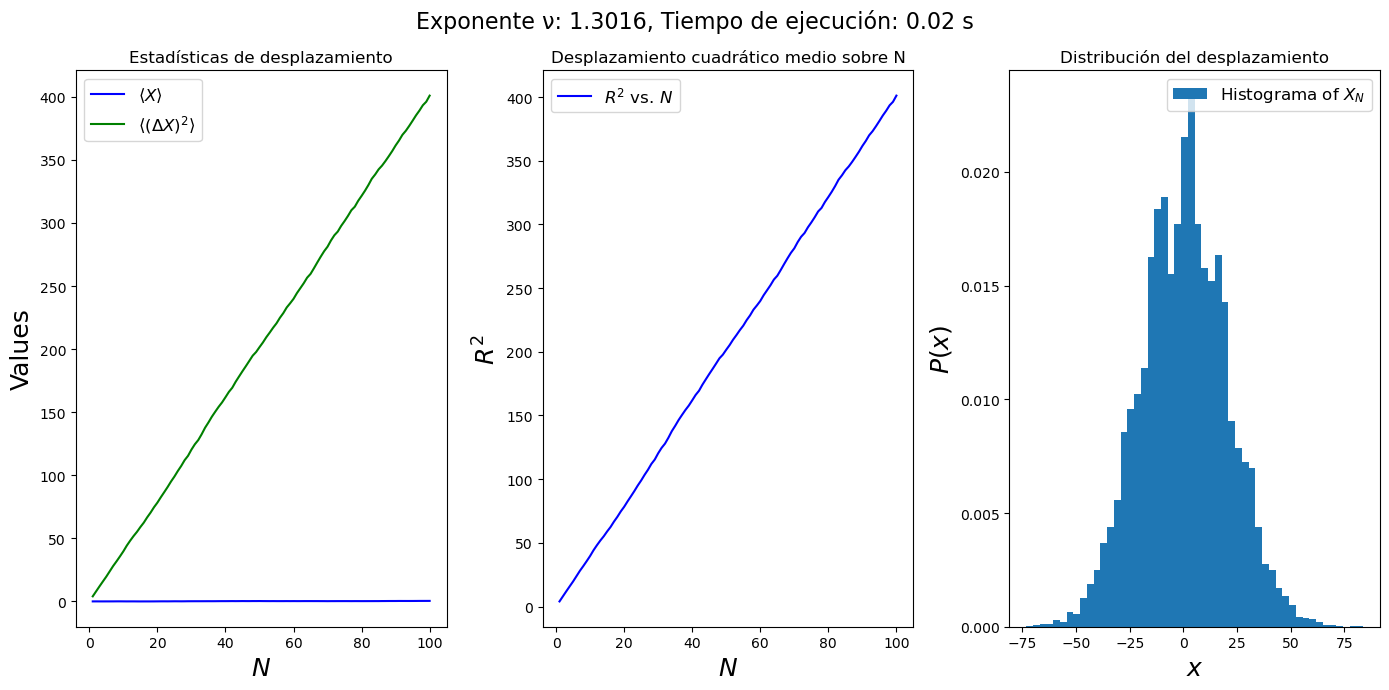

In [91]:
N_1 = 100  
trials = 10000
mu = 2
sigma = 0.1

Xmean, R2, delta_X2, XparaN, nu_1, tiempo = CaminanteAleatorioNormal(N_1, trials, mu, sigma)
plots(N_1, Xmean, R2, XparaN, "Caminantes aleatorios con paso de longitud variable", nu_1, tiempo)

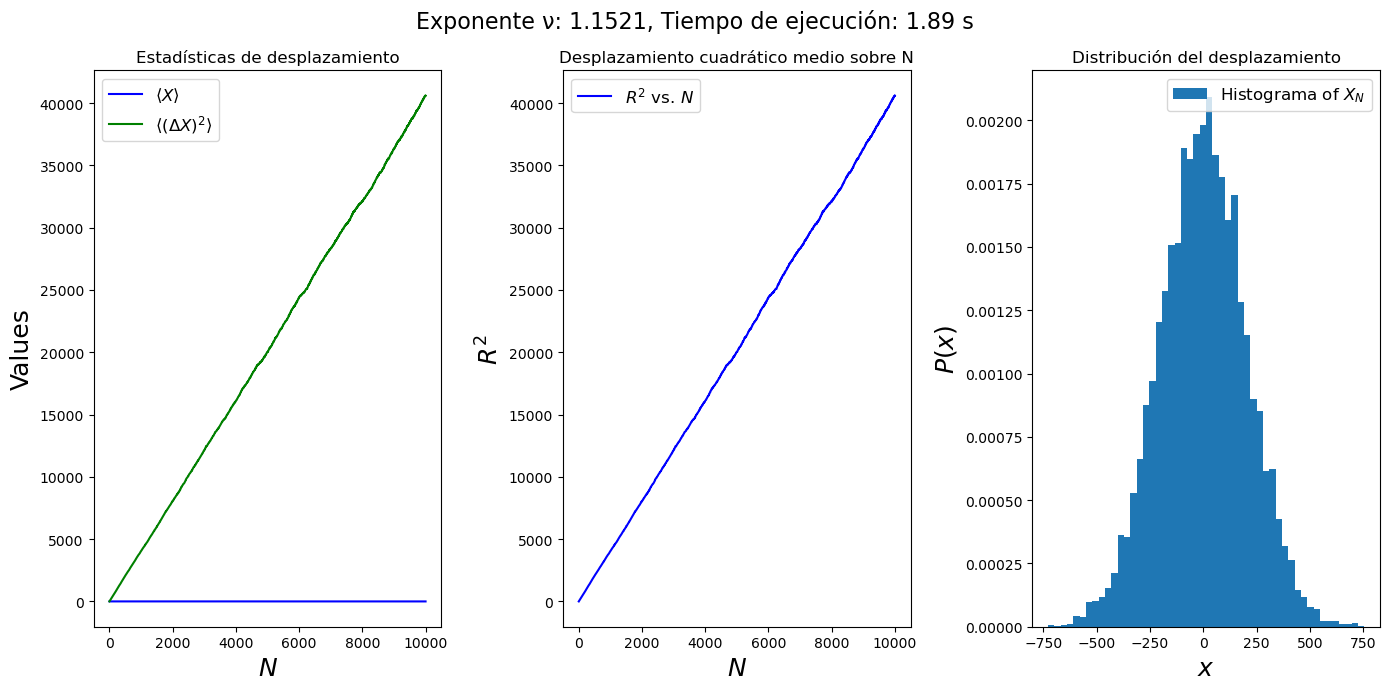

In [92]:
N_2 = 10000

Xmean_n, R2_n, delta_X2_n, XparaN_n, nu_n, tiemp_n = CaminanteAleatorioNormal(N_2, trials, mu, sigma)
plots(N_2, Xmean_n, R2_n, XparaN_n, "Caminantes aleatorios con paso de longitud variable", nu_n, tiemp_n)

### b)

$R^2 = A \cdot N$, donde $A$ es una constante de proporcionalidad que depende de la varianza de la longitud de los pasos.

El código calcula $R^2$ y luego ajusta $A$ usando un ajuste lineal en escala logarítmica para encontrar $ν$, donde $R^2 = e^\nu \cdot N$. La constante $A$ se puede obtener como $A = e^\nu$.


In [93]:
def plots_b(N, Xmean, R2, title, nu, tiempo):
    # Ensure Ngraf and R2 have the same length
    Ngraf = np.arange(1, N + 1)  # This creates an array from 1 to N inclusive
    
    if len(Ngraf) != len(R2):
        print(f"Error: Mismatched lengths. Ngraf length: {len(Ngraf)}, R2 length: {len(R2)}")
        return
    
    # Ajuste lineal para la relación entre R^2 y N
    A, B = np.polyfit(Ngraf, R2, 1)  # A es la pendiente, B es la intersección

    # Crear una serie de datos de ajuste lineal para la gráfica
    ajuste_lineal = A * Ngraf + B

    plt.figure(figsize=(10, 5))
    
    # Graficar R^2 y la línea de ajuste
    plt.plot(Ngraf, R2, 'o', label=r'$R^2$ experimental')
    plt.plot(Ngraf, ajuste_lineal, 'r-', label=f'Ajuste lineal con A={A:.4f}')
    
    plt.xlabel(r'$N$')
    plt.ylabel(r'$R^2$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"La constante A es aproximadamente: {A:.4f}")
    print(f"Tiempo de ejecución: {tiempo:.2f} s")
    print(f"Exponente ν: {nu:.4f}")

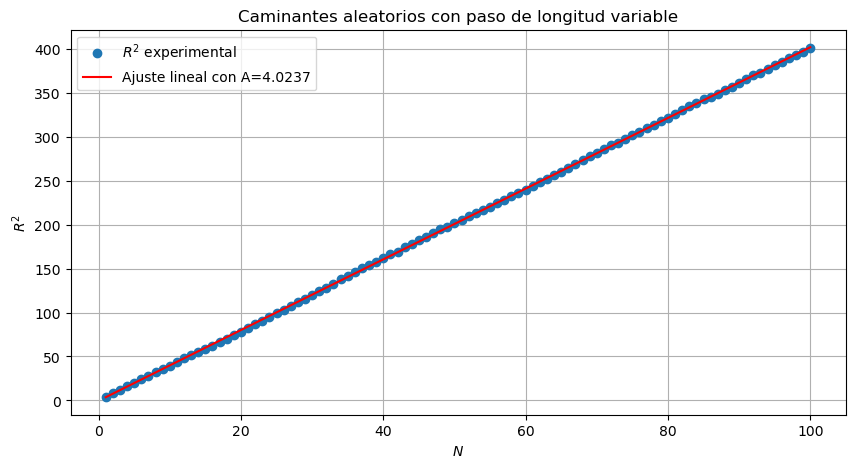

La constante A es aproximadamente: 4.0237
Tiempo de ejecución: 0.02 s
Exponente ν: 1.3016


In [94]:
plots_b(N_1, Xmean, R2, "Caminantes aleatorios con paso de longitud variable", nu_1, tiempo)

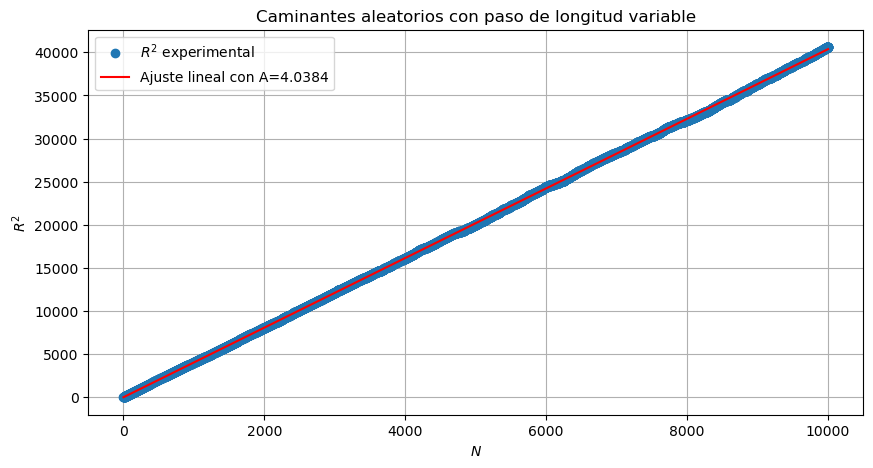

La constante A es aproximadamente: 4.0384
Tiempo de ejecución: 1.89 s
Exponente ν: 1.1521


In [95]:
plots_b(N_2, Xmean_n, R2_n, "Caminantes aleatorios con paso de longitud variable", nu_n, tiemp_n)

### c)

In [96]:
def plots_c(XparaN):
    # Ajuste de los parámetros de la distribución normal
    mu_simulado, std_simulado = norm.fit(XparaN)

    # Histograma de los datos
    plt.figure(figsize=(10, 5))
    count, bins, ignored = plt.hist(XparaN, bins=50, density=True, alpha=0.6, color='b', label='Distribución Simulada')

    # Crear una serie de puntos x para dibujar la curva gaussiana
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_simulado, std_simulado)

    # Dibujar la curva gaussiana
    plt.plot(x, p, 'k', linewidth=2, color='r', label='Distribución Gaussiana')
    plt.title('Comparación de la Distribución Simulada con la Gaussiana')
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.legend()
    plt.show()

/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_46493/4278656211.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r', label='Distribución Gaussiana')


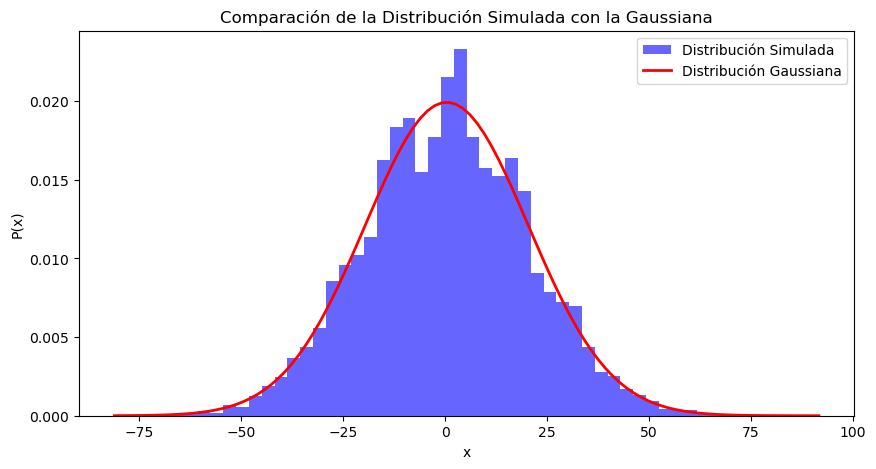

In [97]:
plots_c(XparaN)

/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_46493/4278656211.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r', label='Distribución Gaussiana')


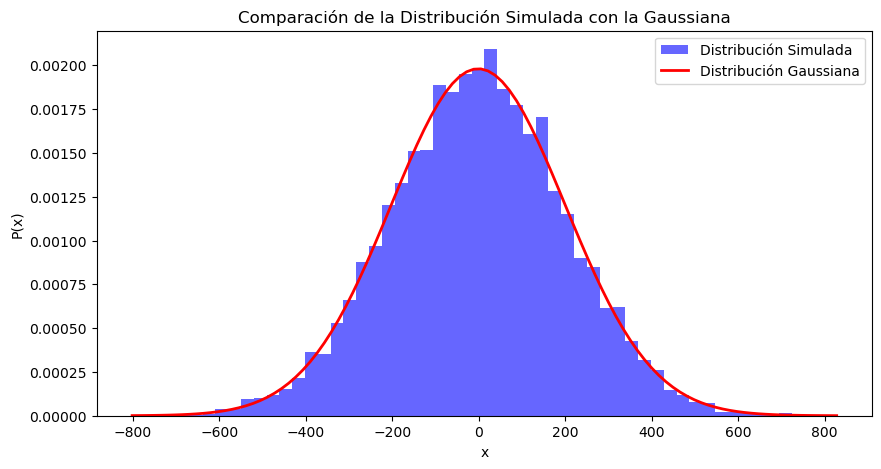

In [98]:
plots_c(XparaN_n)

### d)

In [99]:
mu_2 = 4  # Nueva media del tamaño del paso

Xmean_mu, R2_mu, delta_X2_mu, XparaN_mu, nu_mu, tiempo_mu = CaminanteAleatorioNormal(N_1, trials, mu_2, sigma)

In [100]:
a = np.exp(nu_mu)
print(f"La constante A para mu = 4 es aproximadamente: {a:.4f}")
print(f"Tiempo de ejecución: {tiempo:.2f} s")
print(f"Exponente ν: {nu_mu:.4f}")

La constante A para mu = 4 es aproximadamente: 4.9798
Tiempo de ejecución: 0.02 s
Exponente ν: 1.6054


/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_46493/4278656211.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r', label='Distribución Gaussiana')


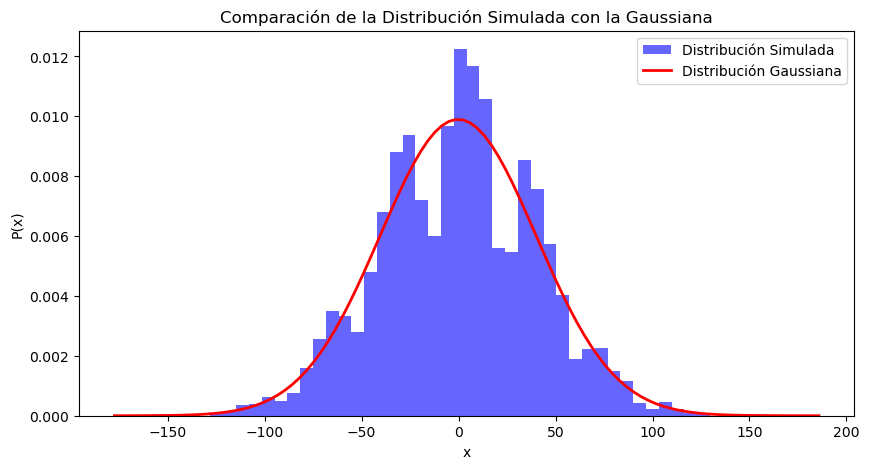

In [124]:
plots_c(XparaN_mu)

In [125]:
# con N = 10000
Xmean_mu2, R2_mu2, delta_X2_mu2, XparaN_mu2, nu_mu2, tiempo_mu2 = CaminanteAleatorioNormal(N_2, trials, mu_2, sigma)

In [126]:
a_2 = np.exp(nu_mu2)
print(f"La constante A para mu = 4 es aproximadamente: {a_2:.4f}")
print(f"Tiempo de ejecución: {tiempo:.2f} s")
print(f"Exponente ν: {nu_mu2:.4f}")

La constante A para mu = 4 es aproximadamente: 3.6748
Tiempo de ejecución: 0.02 s
Exponente ν: 1.3015


/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_46493/4278656211.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r', label='Distribución Gaussiana')


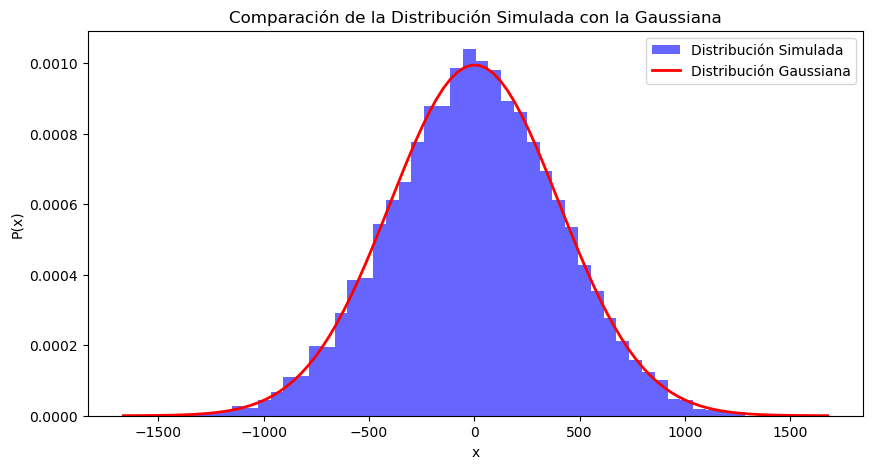

In [127]:
plots_c(XparaN_mu2)

Podemos ver que cuando aumentamos $ \mu $, nuestra constante $ A $ también aumenta, aunque no de manera proporcional. Aunque $ \mu $ se ha duplicado, $ A $ no se incrementa al doble, reflejando una relación no lineal entre el tamaño medio de los pasos y la dispersión cuadrática media. Gráficamente, podemos ver que, aunque $ A $ no aumenta proporcionalmente con $ \mu $, la distribución de la caminata aleatoria aún se ajusta a la gaussiana, lo cual es esperado. Esto es consistente con la naturaleza de la caminata aleatoria, donde el aumento en el tamaño de los pasos lleva a una mayor dispersión en la distribución de los resultados finales, pero la forma general de la distribución sigue siendo normal debido al Teorema del Límite Central. Es importante notar que este incremento en $ A $ no es necesariamente directamente proporcional al aumento en $ \mu $.

# 2

### funciones

In [105]:
def permutation():
    global order, N
    order = np.random.permutation(N)

def vecino(s, j):
    global L, empty
    if j == 0:  # izquierda
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 1:  # derecha
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 2:  # abajo
        if s // L == 0:
            return empty
        else:
            return s - L
    elif j == 3:  # arriba
        if s // L == L - 1:
            return empty
        else:
            return s + L

def boundaries():
    global N, nn
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j)

# Definir la función findroot
def findroot(r, parent):
    while parent[r] >= 0 and r != parent[r]:
        r = parent[r]
    return r

def mergeroots(r1, r2):
    global spanclussize, parent, ns, touchesLeft, touchesRight, Ss, sum_s2_ns
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        sum_s2_ns -= parent[r1]**2
        sum_s2_ns -= parent[r2]**2
        parent[r1] += parent[r2]
        parent[r2] = r1
        ns[-parent[r1]] += 1
        sum_s2_ns += parent[r1]**2
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2]
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            spanclussize = -parent[r1]
        return r1
    else:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        sum_s2_ns -= parent[r1]**2 
        sum_s2_ns -= parent[r2]**2
        parent[r2] += parent[r1]
        parent[r1] = r2
        ns[-parent[r2]] += 1
        sum_s2_ns += parent[r2]**2
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            spanclussize = -parent[r2]
        return r2
    
def percolate():
    global spanclussize, order, parent, nn, ipc, ns, S, Ss, sum_s2_ns

    PSpan = []
    spanclussize = 0
    ns = np.zeros(N + 1, dtype=int)
    nspcpar = np.zeros(N + 1, dtype=int)  # Inicializar nspcpar aquí

    parent = empty * np.ones(N, dtype=int)

    S = []
    sum_s2_ns = 0  # Inicializar la suma acumulativa de s**2 * ns
    den = 0 

    for i in range(N):
        r1 = s1 = order[i]
        parent[s1] = -1
        ns[1] += 1
        sum_s2_ns += 1
        for j in range(4):
            s2 = nn[s1, j]
            if s2 != empty and parent[s2] != empty:
                r1 = mergeroots(r1, findroot(s2))
        
        PSpan.append(spanclussize / (i + 1))

        den = (i+1 - spanclussize)
        if den == 0:
            Ss = 0
        else:
            Ss = (sum_s2_ns - (spanclussize**2)) / den
        
        S.append(Ss)

        if i + 1 > spanclussize:
            S[i] = (sum_s2_ns - spanclussize**2) / (i + 1 - spanclussize)

        if i == ipc:
            nspcpar = np.copy(ns)

    return np.array(PSpan), nspcpar, S

def lineFit(x, y):
    ''' Returns slope and y-intercept of linear fit to (x,y)
    data set'''
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

### simulación

In [121]:
parent = np.loadtxt('parentL512-no.txt', unpack=True)

L = 512
N = L**2

# Convertir 'parent' a enteros y manejar valores negativos grandes como 'empty'
parent = np.array(parent, dtype=np.int64)
empty_value = -1 * (2**30)  # Un valor negativo grande para representar 'empty'
parent[parent < 0] = empty_value

# Inicializar el arreglo para contar los tamaños de los aglomerados
cluster_count = np.zeros(N + 1, dtype=np.int64)

# Procesar el arreglo 'parent' para calcular 'ns'
for site_id in range(N):
    site_parent = parent[site_id]
    if site_parent != empty_value:
        root = findroot(site_id, parent)
        if root != empty_value:
            cluster_count[root] += 1

# Eliminar la entrada 'empty' y ceros (que corresponden a sitios no raíz)
cluster_count = cluster_count[cluster_count > 0]

# Calcular 'ns', el número de aglomerados de cada tamaño
unique_sizes, counts = np.unique(cluster_count, return_counts=True)
ns_distribution = dict(zip(unique_sizes, counts))

# Calcular el tamaño promedio de aglomerado S
sum_s_ns = np.sum(unique_sizes * counts)
sum_s2_ns = np.sum(unique_sizes**2 * counts)
S = sum_s2_ns / sum_s_ns

# Calcular la fracción de ocupación 'p'
occupied_sites = np.sum(cluster_count)
p = occupied_sites / N

### a)

In [114]:
print(f"Distribución de tamaños de aglomerados (ns): {ns_distribution}")

Distribución de tamaños de aglomerados (ns): {1: 852, 2: 504, 3: 330, 4: 223, 5: 143, 6: 115, 7: 83, 8: 75, 9: 67, 10: 61, 11: 41, 12: 31, 13: 35, 14: 35, 15: 30, 16: 26, 17: 21, 18: 19, 19: 19, 20: 20, 21: 11, 22: 16, 23: 14, 24: 11, 25: 14, 26: 11, 27: 6, 28: 10, 29: 10, 30: 12, 31: 9, 32: 7, 33: 6, 34: 6, 35: 4, 36: 4, 37: 6, 38: 4, 39: 3, 40: 5, 41: 4, 42: 1, 43: 4, 44: 1, 45: 7, 47: 3, 48: 4, 49: 7, 50: 3, 51: 4, 52: 4, 53: 3, 54: 2, 55: 4, 56: 3, 57: 2, 59: 1, 60: 7, 61: 2, 62: 2, 63: 1, 65: 4, 66: 1, 67: 2, 69: 1, 70: 3, 71: 1, 73: 1, 74: 1, 75: 1, 76: 3, 77: 1, 78: 1, 79: 2, 80: 1, 83: 1, 85: 1, 88: 1, 90: 1, 92: 3, 95: 1, 99: 1, 101: 1, 102: 2, 104: 1, 107: 1, 108: 2, 110: 1, 112: 1, 113: 1, 117: 1, 118: 1, 122: 2, 124: 1, 128: 1, 131: 1, 133: 1, 139: 1, 141: 2, 147: 1, 148: 1, 160: 1, 161: 2, 168: 1, 170: 1, 174: 1, 177: 1, 186: 2, 193: 1, 195: 2, 197: 1, 199: 1, 205: 1, 209: 2, 219: 1, 220: 1, 225: 1, 226: 1, 228: 1, 230: 1, 234: 1, 241: 1, 247: 1, 278: 1, 290: 1, 295: 1, 29

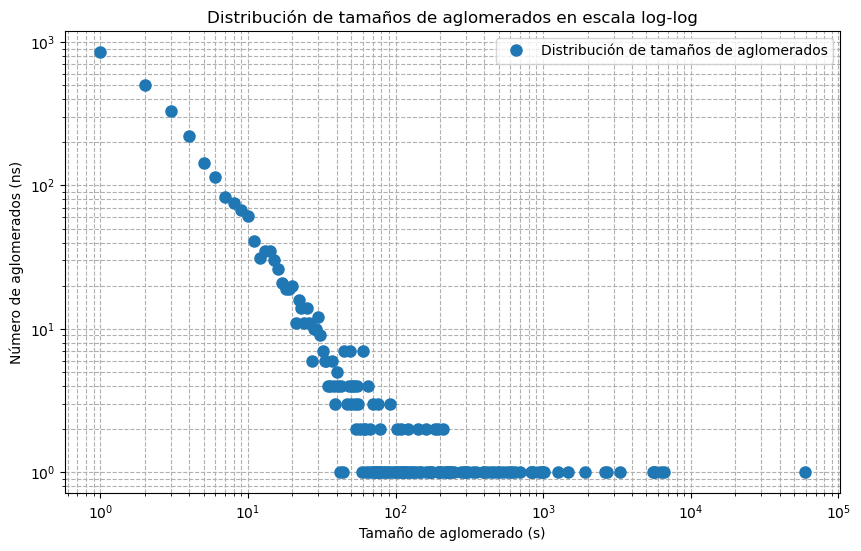

In [119]:
# Graficar la distribución de tamaños de aglomerados 'ns' en escala log-log
plt.figure(figsize=(10, 6))
plt.loglog(unique_sizes, counts, 'o', markersize=8, label='Distribución de tamaños de aglomerados')
plt.xlabel('Tamaño de aglomerado (s)')
plt.ylabel('Número de aglomerados (ns)')
plt.title('Distribución de tamaños de aglomerados en escala log-log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

### b)

In [ ]:
print(f"Fracción de ocupación (p): {p}")

### c)

In [115]:
print(f"Tamaño promedio de aglomerado: {S}")

Tamaño promedio de aglomerado: 20690.96096743457


### d)

In [128]:
parent = np.loadtxt('parentL512-si.txt', unpack=True)

L = 512
N = L**2

# Convertir 'parent' a enteros y manejar valores negativos grandes como 'empty'
parent = np.array(parent, dtype=np.int64)
empty_value = -1 * (2**30)  # Un valor negativo grande para representar 'empty'
parent[parent < 0] = empty_value

# Inicializar el arreglo para contar los tamaños de los aglomerados
cluster_count = np.zeros(N + 1, dtype=np.int64)

# Procesar el arreglo 'parent' para calcular 'ns'
for site_id in range(N):
    site_parent = parent[site_id]
    if site_parent != empty_value:
        root = findroot(site_id, parent)
        if root != empty_value:
            cluster_count[root] += 1

# Eliminar la entrada 'empty' y ceros (que corresponden a sitios no raíz)
cluster_count = cluster_count[cluster_count > 0]

# Calcular 'ns', el número de aglomerados de cada tamaño
unique_sizes, counts = np.unique(cluster_count, return_counts=True)
ns_distribution = dict(zip(unique_sizes, counts))

spanclussize = 59194

# Calcular el tamaño promedio de aglomerado S
sum_s_ns = np.sum(unique_sizes * counts)
sum_s2_ns = np.sum(unique_sizes**2 * counts)
S = sum_s2_ns / sum_s_ns

# Calcular la fracción de ocupación 'p'
occupied_sites = np.sum(cluster_count)
p = occupied_sites / N

In [129]:
print(f"Tamaño promedio de aglomerado: {S}")

Tamaño promedio de aglomerado: 25181.25189720302
